In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np

2022-10-21 10:52:36.502097: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-21 10:52:36.508189: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-21 10:52:36.508211: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [33]:
# 图片的地址
path = "./dogdog.png"

In [54]:
# 定义一个函数load_preprosess_image()读取图片并且把图片解码为三通道的图片
def load_preprosess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image,channels = 3)
    image = tf.image.rgb_to_grayscale(image)
    return image

In [55]:
img = load_preprosess_image(path)

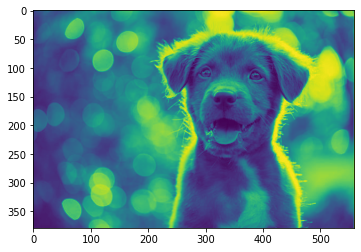

In [36]:
plt.imshow(img)

In [37]:
strides = 2
img.shape[0]//strides,img.shape[1]//strides  #磁化整除讲图片大小缩小

(189, 280)

In [38]:
img_new = np.zeros([img.shape[0]//strides,img.shape[1]//strides,img.shape[2]])
img_new1 = np.zeros([img.shape[0]//strides,img.shape[1]//strides,img.shape[2]])

In [39]:
%%time
for i in range(0,img.shape[0]//strides*strides,strides):
    for j in range(0,img.shape[1]//strides*strides,strides):
        for k in range(img.shape[2]):
            img_new1[i//strides,j//strides,k]=np.average([img[i,j,k],img[i+1,j,k],img[i,j+1,k],img[i+1,j+1,k]])

CPU times: user 38.5 s, sys: 10.7 ms, total: 38.5 s
Wall time: 38.6 s


In [40]:
%%time
for i in range(0,img.shape[0]//strides*strides,strides):
    for j in range(0,img.shape[1]//strides*strides,strides):
        for k in range(img.shape[2]):
            img_new[i//strides,j//strides,k]=max([img[i,j,k],img[i+1,j,k],img[i,j+1,k],img[i+1,j+1,k]])

CPU times: user 39.7 s, sys: 32.8 ms, total: 39.7 s
Wall time: 39.8 s


In [41]:
img_new1.shape,img_new.shape,img.shape

((189, 280, 1), (189, 280, 1), TensorShape([379, 560, 1]))

Text(0.5, 1.0, 'norm')

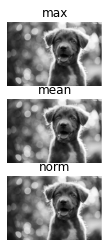

In [47]:
# plt.figure(figsize=(20,30))
fig,ax=plt.subplots(3,1)
# ax[0].figure(figsize=(25,9))
ax[0].imshow(img_new,cmap="gray")
ax[0].axis('off')
ax[0].set_title("max")

# ax[1].figure(figsize=(25,9))
ax[1].imshow(img_new,cmap="gray")
ax[1].axis('off')
ax[1].set_title("mean")#一般

# ax[2].figure(figsize=(25,9))
ax[2].imshow(img_new,cmap="gray")
ax[2].axis('off')
ax[2].set_title("norm")